# **Equilibrium condition for a gas-phase chemical reaction**

We assume a gas-phase chemical reaction and, for simplicity, gases are ideal.

During an irreversible chemical reaction ($0→\sum_i\nu_i\mathrm{A}_i$) carried out at constant $p$ and $T$ in a single-phase system, the variation of the Gibbs energy is given by:

\begin{equation}
    dG=\sum_i \mu_idn_i \tag{1}
\end{equation}

where $\mu_i=\bar G_i=\left(\partial G/\partial n_i \right)_{T,p,n_{j\neq i}}$ is the partial molar Gibbs energy of $i$, _aka_, the chemical potential of $i$.
When the chemical reaction reaches equilibrium the following condition is therefore fulfilled:

\begin{equation}
    \sum_i \mu_idn_i=0  \tag{2}
\end{equation}

The number of moles of each species, $n_i$, can be expressed in the following way:

\begin{equation}
    n_i=n_i(0)+\nu_i\xi \tag{3}
\end{equation}

with $n_i(0)$ referring to the number of moles of $i$ in the initial mixture, and $\xi$ being usually known as the extent of reaction. This quantity has units of moles, and it can be positive or negative depending on how the reaction proceeds from the initial mixture. Therefore eq (2) can be expressed as:

\begin{equation}
    d\xi\sum_i \nu_i\mu_i=0  \tag{4}
\end{equation}

which leads to the condition for equilibrium in a chemical reaction:
\begin{equation}
    \left(\frac{\partial G}{\partial \xi}\right)_{T,p}=\sum_i \nu_i\mu_i=0  \tag{5}
\end{equation}

Note that, when the chemical reaction is carried out in a constant-volume vessel, the state function that should be minimized is the Helmholtz energy $A$. Interestingly, the variation of $A$ at constant $T$ and $V$ leads to:
\begin{equation}
    dA=\sum_i \mu_idn_i \tag{6}
\end{equation}
whose minimization results in an equation similar to eq (5): $\left(\frac{\partial A}{\partial \xi}\right)_{T,V}=\sum_i \nu_i\mu_i=0$. Consequently, the condition for equilibrium in a chemical reaction is given by $\sum_i \nu_i\mu_i=0$, independently on how the gas-phase chemical reaction was carried out (at constant $T$ and $p$, or at constant $T$ and $V$).

The chemical potential of an ideal gas in a mixture can be expressed as:
\begin{equation}
    \mu_i =\mu_i^0+RT\ln(p_i/p^0)  \tag{7}
\end{equation}
with $\mu_i^0$ being the chemical potential for a pressure of $p^0=1$ bar, and $p_i$ the partial pressure of the gas. Therefore, the equilibrium condition of eq (5) can be expressed as:
\begin{equation}
    \sum_i \nu_i\mu_i=\sum_i\nu_i\mu_i^0+RT\sum_i\nu_i\ln(p_{i,eq}/p^0)=0  \tag{8}
\end{equation}
which can be expressed as:
\begin{equation}
    \Delta G^0=-RT\ln\left(\prod_i(p_{i,eq}/p^0)^{\nu_i}\right)  \tag{9}
\end{equation}
where $\Delta G^0$ is the standard Gibbs energy or reaction, and the product of eq (9) is the so-called standard pressure equilibrium constant $K_p^0$, which leads to the well known equation:
\begin{equation}
    \Delta G^0=-RT\ln K_p^0  \tag{10}
\end{equation}


## **The case of a chemical reaction conducted at constant $p$ and $T$**
The chemical potential obtained in eq (7) can be expressed as:
\begin{equation}
    \mu_i =\mu_i^0+RT\ln(p/p^0)+RT\ln x_i=\mu_i^*+RT\ln x_i  \tag{11}
\end{equation}
where $\mu_i^*$ is the chemical potential of pure $i$ and is a constant for a chemical transformation at constant $T$ and $p$, while $x_i$ depends on $\xi$ in the following way [see eq (3)]:
\begin{equation}
    x_i =\frac{n_i(0)+\nu_i\xi}{n(0)+\Delta\nu\xi} \tag{12}
\end{equation}
with $n(0)$ being the initial number of moles, and $\Delta\nu=\sum_i\nu_i$. From eq (3) and the gas law, it follows that, in a constant $T$ and $p$ chemical reaction, the volume of the reaction vessel has to change in the same proportion as the number of moles.
The variation of the Gibbs energy with $\xi$ can be easily obtained from its definition and eqs (3) and (7):
\begin{equation}
    G =\sum_in_i\mu_i=\sum_in_i(0)\mu_i^*+\xi\sum_i\nu_i\mu_i^*+RT\sum_in_i\ln x_i \tag{13}
\end{equation}
which can be expressed in the following way:
\begin{equation}
    G =G^*(0)+\xi\Delta G^*+\Delta _{\mathrm{mix}} G(\xi) \tag{14}
\end{equation}
with $G^*(0)$ being the Gibbs energy of the pure gases (_i.e._, before mixing) present at the beginning of the chemical reaction. $\Delta G^*$ is the change in $G$ of the separated pure reactants, into the separated pure products, both at $p$ and $T$. This quantity is just the standard Gibbs energy of reaction $\Delta G^0$ when $p=1$ bar. The last term represents the drop in the Gibbs energy when the gases mix up, and it shows a complicated dependence with the extent of reaction:
\begin{equation}
    \Delta _{\mathrm{mix}} G(\xi)=RT\sum_i(n_i(0)+\nu_i\xi)\ln \frac{n_i(0)+\nu_i\xi}{n(0)+\Delta\nu\xi} \tag{15}
\end{equation}
Therefore minimization of eq (13) leads to:
\begin{equation}
    \frac{dG}{d\xi}=\sum_i\nu_i\mu_i^*+RT\sum_i\left(\frac{dn_i}{d\xi}\ln x_i+n\frac{dx_i}{d\xi}\right) \\  
    =\sum_i\nu_i\mu_i^0+RT\sum_i\ln(p/p^0)^{\nu_i}+RT\sum_i\ln x_i^{\nu_i}+nRT\sum_i\frac{dx_i}{d\xi} \\
    =\Delta G^0+RT\sum_i\ln(p_i/p^0)^{\nu_i}+nRT\frac{d}{d\xi}\sum_ix_i \\
    =\Delta G^0+RT\sum_i\ln(p_i/p^0)^{\nu_i} \tag{16}
\end{equation}
At equilibrium:
\begin{equation}
    \frac{dG}{d\xi}=0=\Delta G^0+RT\sum_i\ln(p_{i,eq}/p^0)^{\nu_i} \\
    \Delta G^0=-RT\ln K_p^0\tag{17}
\end{equation}
which is the same result as that obtained above.


### **Working with an example reaction $0→\nu_iA_i$**

In [1]:
#@title Installation of packages. It takes $\approx$ 1 min
%%capture
! sudo apt update
! sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
! pip install --prefer-binary pyscf
! pip install pyscf[geomopt]
! pip install dftd3 dftd4
! pip install pubchempy chempy
! pip install --upgrade x3dase

Input your chemical reaction here:  A -> 2 B

 A ⇌ 2 B EQUILIBRIUM PROPERTIES
Kp from stantard Gibbs energy of rxn = 0.199
Extent of rxn = 0.218 mol
Moles of 'A' = 0.782 mol
Moles of 'B' = 0.436 mol
Partial pressure of 'A' = 0.642 bar
Partial pressure of 'B' = 0.358 bar
kp from the partial pressures 0.199


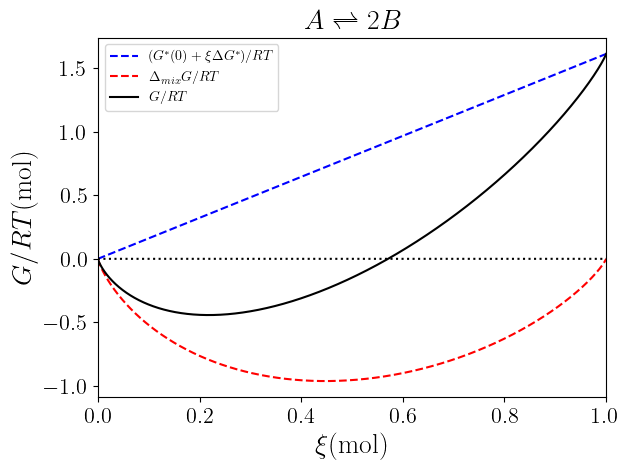

In [3]:
#@title To input your chemical rxn, use blank spaces to separate, stochiometric coeffs, species and arrow like in this example: A + B -> 2 C + 3 D
from chempy.chemistry import Species, Equilibrium, Reaction
from chempy import Substance
import numpy as np
import matplotlib.pyplot as plt
# Defining some constants
m_u    = 1.66053886e-27      # atomic mass constant in kg
h      = 6.6260693e-34       # Planck's constant in J*s
k_B    = 1.3806505e-23       # Boltzmann's constant in J/K
c      = 2.99792558e8        # Speed of light in m/s
bar2Pa = 1e5                 # 1 bar to N/m**2
Pa2bar = 1e-5                # 1 Pa=N/m**2 to bar
p0     = 1                   # standard pressure in bar
R      = 8.314472e-3         # Gas constant in kJ/(K mol)
H2kcal = 627.509             # Hartree to kcal/mol
H2kJ   = 2625.5              # Hartree to kJ/mol
Rbar   = 0.0831446618        # R in bar L / (mol K)

r = Reaction.from_string(input("Input your chemical reaction here:  "))
eq = Equilibrium(r.reac, r.prod)

#Obtain the stoichiometric coefficients and the species from the rxn
nui_from_r = []; species = []
for s in r.reac:
  species.append(s)
  nui_from_r.append(-r.reac[s])
for s in r.prod:
  species.append(s)
  nui_from_r.append(r.prod[s])

fake_keys = ['H2O','H2']
subst = {k: Substance.from_formula(k) for k in fake_keys}
eq_unicode=eq.unicode(subst)
eq_latex='$'+eq.latex(subst)+'$'

# pressure of 1 bar and T = 298.15 K
p = 1
T = 298.15
#n_species taken from the length of the nui_from_r
n_species = len(nui_from_r)
#nui is an array with the stochiometric coeffs
nui = np.array(nui_from_r)
#ni0 is an array with the initial number of moles
ni0 = np.array([1,0])
#mui0 are the standard chemical potentials of the species (kJ/mol)
mui0 = np.array([0,2])
#muistar is the chemical potential for the pure species = mui0+RTln(p/p0)
muistar = mui0 + R * T * np.log(p/p0)
deltaG0 = sum(nui * mui0)

k_p = np.exp(-deltaG0/R/T)

#max(ni0) has to be changed if a limiting reactant exists
x = np.linspace(1e-10,max(ni0)-1e-10,num=10000)

#n is the total number of moles and xi is the molar fraction
n = sum(ni0) + sum(nui) * x
xi = []
for k,ele in enumerate(ni0):
  xi.append((ni0[k] + x * nui[k]) / n)
xia = np.array(xi)

G_star = 1 / R / T * ( sum(ni0 * muistar) + x * sum(nui * muistar) )
G_mix  = n * sum(xia*np.log(xia))
G = G_star + G_mix
y = np.zeros(x.size)
x_eq = x[np.argmin(G)]
n_eq = sum(ni0) + sum(nui) * x_eq

print('\n',eq_unicode,'EQUILIBRIUM PROPERTIES')
print('Kp from stantard Gibbs energy of rxn = %5.3f' % k_p)
print('Extent of rxn = %5.3f mol' % x_eq )
for k,ele in enumerate(ni0):
  print('Moles of %a = %5.3f mol' % (species[k],ele+x_eq * nui[k]))

p_eq = []
k_from_peq = 1
for k,ele in enumerate(ni0):
  p_eq.append((ele+x_eq * nui[k])/n_eq * p )
  print('Partial pressure of %a = %5.3f bar' % (species[k],p_eq[k]))
  k_from_peq *= p_eq[k] ** nui[k]
print('kp from the partial pressures %5.3f' % k_from_peq)

plt.rcParams['text.usetex'] = True
plt.title(eq_latex,fontsize=20)
plt.plot(x,G_star,'--',color='blue',label=r'$(G^*(0)+\xi\Delta G^*)/RT$')
plt.plot(x,G_mix,'--',color='red',label=r'$\Delta _{mix}G/RT$')
plt.plot(x,G,'-',color='black',label=r'$G/RT$')
plt.plot(x,y,':',color='black')
plt.ylabel(r'$G/RT (\mathrm{mol})$',fontsize=20)
plt.xlabel(r'$\xi (\mathrm{mol})$',fontsize=20)
plt.legend()
plt.xlim(0,max(x))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# **Calculation of $K_p$ using thermochemistry and simulations: the $\mathrm{N}_{2}\mathrm{O}_{4} \rightleftharpoons 2 \mathrm{NO}_{2}$ reaction**

In [ ]:
#@title Function to determine $\mu^0$ based on a Python script from [AutoMeKin](https://github.com/emartineznunez/AutoMeKin)

import numpy as np

def G_m_0(temp,m,A,B,C,lin_A,nat_A,sigma,spin,*freq):
  import math
  q_t = (2*math.pi*m*m_u*k_B*temp/h/h)**1.5*k_B*temp/bar2Pa
  St = R * np.log(q_t)
  Ut = 1.5 * R * temp
  q_r = 1 ; q_v = 1 ; Sr = 0 ; Sv = 0 ; Ur = 0 ; Uv = 0
  if nat_A > 1:
    rA  = h * c * 100 * A / k_B
    rB  = h * c * 100 * B / k_B
    rC  = h * c * 100 * C / k_B
    if lin_A == 0:
      q_r = 1 / sigma * math.sqrt(math.pi)*(temp**1.5/math.sqrt(rA*rB*rC))
      Sr = R * (1.5 + np.log(q_r))
      Ur = 1.5 * R * temp
    else:
      if rA == 0:
        rl = math.sqrt(rB*rC)
      elif rB == 0:
        rl = math.sqrt(rA*rC)
      else:
        rl = math.sqrt(rA*rB)
      q_r = 1 / sigma * temp / rl
      Sr = R * (1 + np.log(q_r))
      Ur = R * temp
    for ele in freq:
      rv   = h * c * 100 * float(ele) / k_B
      q_v *= 1 / (1 - np.exp(-rv/temp))
      Sv  += R * (rv / temp / (np.exp(rv/temp) - 1) - np.log(1 - np.exp(-rv/temp)) )
      Uv += R * rv / (np.exp(rv/temp) - 1)
  q_e = spin +1
  q = q_t * q_r * q_v * q_e
  return - R * temp * np.log(q)


## **We now focus on the $\mathrm{N}_{2}\mathrm{O}_{4} \rightleftharpoons 2 \mathrm{NO}_{2}$ reaction**

In [ ]:
#@title Using [Chempy](https://pypi.org/project/chempy/) to handle the $\mathrm{N}_{2}\mathrm{O}_{4} \rightleftharpoons 2 \mathrm{NO}_{2}$ reaction
from operator import mul
from functools import reduce
from itertools import product
import chempy
from chempy import Substance
from chempy.chemistry import Species, Equilibrium, Reaction
from chempy.equilibria import EqSystem, NumSysLog, NumSysLin
from chempy import balance_stoichiometry
import numpy as np
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt

temp = 298.15
reactf='N2O4'
prodf='NO2'
spin=[]
react = Substance.from_formula(reactf)
prod  = Substance.from_formula(prodf)
#print("Reactant:",react.unicode_name)
#print("Product :",prod.unicode_name)
spin_react=spin_prod=0
for ele in react.composition.keys(): spin_react += ele * react.composition[ele]
spin.append(spin_react % 2)
for ele in prod.composition.keys(): spin_prod += ele * prod.composition[ele]
spin.append(spin_prod % 2)
print("Spin list:",spin)

reac, pr = balance_stoichiometry({reactf},{prodf})

equilibrium = Equilibrium(reac, pr)

keys = [reactf,prodf]

subst = {k: Substance.from_formula(k) for k in keys}

r_latex=equilibrium.latex(subst)
r_unicode=equilibrium.unicode(subst)
print(r_unicode)


In [ ]:
#@title Retrieving structures of reactant and product from [PubChem](https://pubchem.ncbi.nlm.nih.gov/)
import pubchempy as pcp

keys1=['N2O4', 'nitrogen dioxide']
#print(keys)
#print(keys1)
natom = []
for k,ele in enumerate(keys1):
  molA = ele
  #molA = input('Name of your substance: ')
  queryA0 = pcp.get_compounds(molA,'name')
  queryA = pcp.get_compounds(molA,'name',record_type='3d')
  if(len(queryA)==0): queryA = queryA0
  cid_A = pcp.get_cids(molA)
  if len(cid_A) == 0: print('Molecule not found')
  else: print('CID of',Substance.from_formula(keys[k]).unicode_name,': ',cid_A)

  m = queryA[0]
  natom.append(len(m.atoms))
  f = open(keys[k]+'.xyz','w')
  if natom[k] > 1:
    f.write(str(natom[k])+'\n\n')
    for i,a in enumerate(m.atoms):
      if a.z is None: a.z = 0.0
      f.write(m.elements[i]+' '+str(a.x)+' '+str(a.y)+' '+str(a.z)+'\n')
  else:                            f.write(m.elements[0]+' 0. 0. 0.\n')
  f.close()

In [ ]:
#@title ### Using [pyscf](https://pyscf.org) to optimize the structures at the PBE0-D4/6-31G level of theory. This takes a few minutes...
%%capture
from pyscf import gto, scf
from pyscf.hessian import thermo
from pyscf.geomopt.geometric_solver import optimize
import dftd4.pyscf as disp4
import os

#os.environ['OMP_NUM_THREADS'] = "8"

e0 = []
A = []
B = []
C = []
lin = []
freq_info = []
mass = []
sigma = []
mol_eq = []

functional ='pbe0'
for k,ele in enumerate(keys):
  mol = gto.M(atom = ele+".xyz",spin=spin[k],basis='6-31g')
  if spin[k] == 0: mf = mol.RKS(xc=functional)
  else: mf = mol.UKS(xc=functional)
# optimization
  mol_eq.append(optimize(mf, maxsteps=100))

  if spin[k] == 0: mf = mol_eq[k].RKS(xc=functional).run()
  else: mf = mol_eq[k].UKS(xc=functional).run()

  hessian = mf.Hessian().kernel()

  freq_info.append(thermo.harmonic_analysis(mf.mol, hessian))
  thermo_info = thermo.thermo(mf, freq_info[k]['freq_au'], temp, 101325)
  mass.append(mol.atom_mass_list(isotope_avg=True))
  rot_info = thermo.rotation_const(mass[k],mol_eq[k].atom_coords())
  sigma.append(thermo.rotational_symmetry_number(mol_eq[k]))

  A.append(rot_info[0] * 0.033357)
  B.append(rot_info[1] * 0.033357)
  C.append(rot_info[2] * 0.033357)
  if A[k] == B[k] and C[k] <= 0.001: lin.append(1)
  else: lin.append(0)

  d4 = disp4.DFTD4Dispersion(mol_eq[k],xc=functional)
  e0.append(thermo_info['E0'][0] + d4.kernel()[0] + thermo_info['ZPE'][0])


In [ ]:
#@title Computing $G_m^0$, _aka_ the standard chemical potential $\mu^0$
from x3dase.visualize import view_x3d_n
from ase.io import read
import IPython

gcorr = []
g = []

for k,ele in enumerate(keys):
  gcorr.append(G_m_0(temp,sum(mass[k]),A[k],B[k],C[k],lin[k],natom[k],sigma[k],spin[k],*freq_info[k]['freq_wavenumber']))
  g.append( e0[k] * H2kJ + gcorr[k] )
  print('Frequencies of',Substance.from_formula(ele).unicode_name,'(cm^-1)')
  for ifreq in freq_info[k]['freq_wavenumber']:
    print('%10.0f' % ifreq)
  gto.tofile(mol_eq[k],str(keys[k])+'_opt.xyz')
  print("")


deltaG = (2 * g[1] - g[0])

print('deltaG: %3.2f kJ/mol' % deltaG)

# Results (D4 dispersion):
# b3lyp/6-31g*     --> 11.20 kJ/mol
# b3lyp/def2svp    --> 15.48 kJ/mol
# pbe0/6-31g       -->  4.52 kJ/mol   *************
#Tabulated value --> 4.7 kJ/mol

In [ ]:
#@title Visualization of the reactant
atoms = read(str(keys[0])+'_opt.xyz')
view_x3d_n(atoms,output=str(keys[0])+'_opt.html', bond=1.0, label=True)
IPython.display.HTML(filename=str(keys[0])+'_opt.html')

In [ ]:
#@title Visualization of the product
atoms = read(str(keys[1])+'_opt.xyz')
view_x3d_n(atoms,output=str(keys[1])+'_opt.html', bond=1.0, label=True)
IPython.display.HTML(filename=str(keys[1])+'_opt.html')

### **KMC simulation**

In [ ]:
#@title Installing KMC code (taken from AutoMeKin package)
%%capture
%cd /opt
! curl -LJO https://raw.githubusercontent.com/emartineznunez/Kp/main/src/kmc.f90
! gfortran -o kmc.exe kmc.f90
%cd /content
! curl -LJO https://raw.githubusercontent.com/emartineznunez/Kp/main/data/N2O4.dat
%env PATH="/content:.:/opt:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin"

In [ ]:
#@title Running the calculation
!kmc.exe<N2O4.dat>N2O4.out